# Pandas 기초

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pandas 개념
- pandas 는 dict 를 확장한 개념이다
- 2차원 테이블 형태를 주로 다룬다
- 주로 칼럼 위주로 처리가 일어난다
- pandas 데이터에는 항상 칼럼명과 인덱스가 붙는다
- 데이터타입 종류
    - pd.DataFrame
    - pd.Series

In [2]:
d = {'a':[1,2], 'b': [11,12], 'c': [21,22]}
df = pd.DataFrame(d)
df

a   b   c
0  1  11  21
1  2  12  22

In [4]:
df['b']

0    11
1    12
Name: b, dtype: int64

In [8]:
type(df), type(df['a'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [5]:
df2 = pd.DataFrame(np.arange(12).reshape(4,3))
df2

0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [7]:
df2[2] # 칼럼명이 0인 열을 가져온다

0     2
1     5
2     8
3    11
Name: 2, dtype: int32

In [13]:
df2.values

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### Series

In [46]:
s = pd.Series([11,12,13,14])
s

0    11
1    12
2    13
3    14
dtype: int64

In [47]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [48]:
s.index = range(100,104)

In [49]:
s

100    11
101    12
102    13
103    14
dtype: int64

In [50]:
s.name

In [51]:
s.name='test'
s

100    11
101    12
102    13
103    14
Name: test, dtype: int64

In [53]:
s[100]

11

In [54]:
s[[100,102]]

100    11
102    13
Name: test, dtype: int64

In [15]:
s[[True,False, False,True]]

10    1
13    4
Name: test, dtype: int64

In [16]:
s.name, s.index.name

('test', None)

In [18]:
s.index.name = 'num'
s.name, s.index.name

('test', 'num')

### DataFrame

In [15]:
d = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])
d

0  1  2
0  1  2  3
1  4  5  6
2  7  8  9

In [16]:
d.columns

RangeIndex(start=0, stop=3, step=1)

In [17]:
d.index

RangeIndex(start=0, stop=3, step=1)

In [9]:
d = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=['col1','col2','col3'])
d

col1  col2  col3
0     1     2     3
1     4     5     6
2     7     8     9

In [10]:
d.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [11]:
d.index

RangeIndex(start=0, stop=3, step=1)

In [12]:
d.columns = ['a','b','c'] # list('abc')

In [13]:
d

a  b  c
0  1  2  3
1  4  5  6
2  7  8  9

In [14]:
d.index=['row1','row2','row3']
d

a  b  c
row1  1  2  3
row2  4  5  6
row3  7  8  9

In [15]:
d.index = range(3)
d

a  b  c
0  1  2  3
1  4  5  6
2  7  8  9

In [16]:
d['c']

0    3
1    6
2    9
Name: c, dtype: int64

In [18]:
d['c'][1], d['b'][2]

(6, 8)

- numpy 식으로 인덱싱/슬라이싱 => d.iloc[행번호,열번호]

In [20]:
d.iloc[1,2], d.iloc[2,1]

(6, 8)

In [26]:
d.iloc[0]

a    1
b    2
c    3
Name: 0, dtype: int64

In [27]:
d.iloc[0,2]

3

In [28]:
d.iloc[:1,1:]

b  c
0  2  3

- s.name 은 칼럼명, s.index.name 은 d.index.name 이 된다

In [21]:
d.index.name

'num'

In [22]:
d.columns

Index(['test'], dtype='object')

In [23]:
d.index

RangeIndex(start=10, stop=14, step=1, name='num')

In [29]:
d = pd.DataFrame({'name': ['hong', 'jang', 'dooley'],
                 'age': [22,33,11],
                 'address': ['seoul', 'daejeon', 'etc']})
d

address  age    name
0    seoul   22    hong
1  daejeon   33    jang
2      etc   11  dooley

In [22]:
d = pd.DataFrame([['hong',22,'seoul'], ['jang',33,'daejeon'], ['dooley',11,'etc']],
                columns=['name','age','address'])
d

name  age  address
0    hong   22    seoul
1    jang   33  daejeon
2  dooley   11      etc

In [32]:
d = pd.DataFrame([['hong',22,'seoul'], ['jang',33,'daejeon'], ['dooley',11,'etc']])
d.columns = ['name','age','address']
d

name  age  address
0    hong   22    seoul
1    jang   33  daejeon
2  dooley   11      etc

- 칼럼 하나를 뽑아내면 Series 가 된다.
- 칼럼명은 Series 의 name 이 된다

In [33]:
d['name']

0      hong
1      jang
2    dooley
Name: name, dtype: object

In [34]:
type(d['name'])

pandas.core.series.Series

In [35]:
d.shape

(3, 3)

In [36]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
name       3 non-null object
age        3 non-null int64
address    3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [37]:
d.describe()

age
count   3.0
mean   22.0
std    11.0
min    11.0
25%    16.5
50%    22.0
75%    27.5
max    33.0

- 팬시 색인은 칼럼을 선택하고, 불리언 색인은 레코드를 선택한다
- 범위를 지정하면 레코드가 선택된다

In [23]:
d

name  age  address
0    hong   22    seoul
1    jang   33  daejeon
2  dooley   11      etc

In [40]:
d[['name','age']]

name  age
0    hong   22
1    jang   33
2  dooley   11

In [41]:
d.iloc[:2]

name  age  address
0  hong   22    seoul
1  jang   33  daejeon

In [42]:
d[:2]

name  age  address
0  hong   22    seoul
1  jang   33  daejeon

In [43]:
d[[True, False, True]]

name  age address
0    hong   22   seoul
2  dooley   11     etc

In [35]:
d[d['age']>20] # select * from d where age>20

name  age address
0    hong   22   seoul
2  dooley   11     etc

In [25]:
d['age']>20

0     True
1     True
2    False
Name: age, dtype: bool

### 칼럼명으로 칼럼 지정

In [26]:
d

name  age  address
0    hong   22    seoul
1    jang   33  daejeon
2  dooley   11      etc

In [44]:
d['name']

0      hong
1      jang
2    dooley
Name: name, dtype: object

In [45]:
d.name

0      hong
1      jang
2    dooley
Name: name, dtype: object

In [27]:
d.age

0    22
1    33
2    11
Name: age, dtype: int64

In [28]:
d.address

0      seoul
1    daejeon
2        etc
Name: address, dtype: object

In [38]:
d.name[:2]

0    hong
1    jang
Name: name, dtype: object

In [39]:
d['name'][:2]

0    hong
1    jang
Name: name, dtype: object

### NULL 처리
- None 또는 np.nan 으로 널값을 할당 할 수 있다
- None, null, nan, NaN, np.nan, na

In [29]:
#0,,2
#3,4,5

d = pd.DataFrame([[0,None,2], [3,4,5]]) # np.nan
d

0    1  2
0  0  NaN  2
1  3  4.0  5

In [30]:
d[1][0] # d.iloc[0,1]

numpy.float64

In [49]:
d[2][1]=None
d

0    1    2
0  0  NaN  2.0
1  3  4.0  NaN

In [50]:
d.iloc[1,0] = None
d

0    1    2
0  0.0  NaN  2.0
1  NaN  4.0  NaN

In [51]:
d.isna()

0      1      2
0  False   True  False
1   True  False   True

In [52]:
d.isnull()

0      1      2
0  False   True  False
1   True  False   True

In [54]:
d.notnull()

0      1      2
0   True  False   True
1  False   True  False

### DataFrame 이름 부여

In [58]:
d = pd.DataFrame([[0,1],[2,3],[4,5]])
d

0  1
0  0  1
1  2  3
2  4  5

In [59]:
d.index.name = 'num'
d.columns.name = 'cols'
d

cols  0  1
num       
0     0  1
1     2  3
2     4  5

In [60]:
d.columns = ['col1','col2']
d.index = [100,101,102]
d

col1  col2
100     0     1
101     2     3
102     4     5

In [61]:
d.index.name = 'nums'
d.columns.name = 'cols'
d

cols  col1  col2
nums            
100      0     1
101      2     3
102      4     5

### 항목 찾기

In [64]:
d.loc[101,'col2']

3

In [67]:
d.iloc[1,1]

3

In [69]:
d.iloc[:2,1:]

cols  col2
nums      
100      1
101      3

In [70]:
d.iloc[0] # 결과는 Series

cols
col1    0
col2    1
Name: 100, dtype: int64

### 인덱스

In [71]:
d = pd.DataFrame(np.arange(12).reshape(4,3))
d

0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [72]:
display(d.columns, d.index)

RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=4, step=1)

In [2]:
d = pd.DataFrame(np.arange(12).reshape(4,3),
                 columns=['col1','col2','col3'],
                 index=[101,102,103,104])
d

col1  col2  col3
101     0     1     2
102     3     4     5
103     6     7     8
104     9    10    11

In [78]:
display(d.columns, d.index)

Index(['col1', 'col2', 'col3'], dtype='object')

Int64Index([101, 102, 103, 104], dtype='int64')

In [79]:
d.index=list('abcd')
d

col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8
d     9    10    11

In [80]:
d.index

Index(['a', 'b', 'c', 'd'], dtype='object')

### reindex()
- 기존의 인덱스를 재배치한다

In [82]:
d.reindex(list('dcba'))

col1  col2  col3
d     9    10    11
c     6     7     8
b     3     4     5
a     0     1     2

In [85]:
d

col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8
d     9    10    11

In [86]:
d.reindex(list('abcde'))

col1  col2  col3
a   0.0   1.0   2.0
b   3.0   4.0   5.0
c   6.0   7.0   8.0
d   9.0  10.0  11.0
e   NaN   NaN   NaN

In [87]:
d.reindex(list('abcde'), fill_value=0)

col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8
d     9    10    11
e     0     0     0

In [88]:
d.reindex(columns=['col2','col3','col4'])

col2  col3  col4
a     1     2   NaN
b     4     5   NaN
c     7     8   NaN
d    10    11   NaN

### set_index(), reset_index()

In [33]:
data = pd.DataFrame([['hong',22,'seoul','hong@naver.com'],
                  ['jang',33,'incheon','jang@gmail.com'],
                  ['dooley',11,'etc','dooley@andromeda.uni']],
                columns=['name','age','address','email'])
data

name  age  address                 email
0    hong   22    seoul        hong@naver.com
1    jang   33  incheon        jang@gmail.com
2  dooley   11      etc  dooley@andromeda.uni

In [58]:
data2 = data.set_index('name')
data2

age  address                 email
name                                      
hong     22    seoul        hong@naver.com
jang     33  incheon        jang@gmail.com
dooley   11      etc  dooley@andromeda.uni

In [104]:
data2.reset_index()

name  age  address                 email
0    hong   22    seoul        hong@naver.com
1    jang   33  incheon        jang@gmail.com
2  dooley   11      etc  dooley@andromeda.uni

In [105]:
data2.reset_index(drop=True)

age  address                 email
0   22    seoul        hong@naver.com
1   33  incheon        jang@gmail.com
2   11      etc  dooley@andromeda.uni

In [34]:
data3 = data[::-1]
data3

name  age  address                 email
2  dooley   11      etc  dooley@andromeda.uni
1    jang   33  incheon        jang@gmail.com
0    hong   22    seoul        hong@naver.com

In [35]:
data3.reset_index()

index    name  age  address                 email
0      2  dooley   11      etc  dooley@andromeda.uni
1      1    jang   33  incheon        jang@gmail.com
2      0    hong   22    seoul        hong@naver.com

In [108]:
data3.reset_index(drop=True)

name  age  address                 email
0  dooley   11      etc  dooley@andromeda.uni
1    jang   33  incheon        jang@gmail.com
2    hong   22    seoul        hong@naver.com

### 칼럼 범위

In [36]:
d = pd.DataFrame(np.arange(12).reshape(4,3), columns=['col1','col2','col3'])
d

col1  col2  col3
0     0     1     2
1     3     4     5
2     6     7     8
3     9    10    11

In [37]:
d = pd.DataFrame({'col1':[0,3,6,9], 'col2':[1,4,7,10], 'col3':range(2,12,3)})
d

col1  col2  col3
0     0     1     2
1     3     4     5
2     6     7     8
3     9    10    11

In [39]:
#d.index = ['a','b','c','d']
d.index=list('abcd')
d

col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8
d     9    10    11

In [90]:
d

col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8
d     9    10    11

In [91]:
d['col1'] # Series

a    0
b    3
c    6
d    9
Name: col1, dtype: int32

In [93]:
d[['col1']] # DataFrame

col1
a     0
b     3
c     6
d     9

In [40]:
d[['col1','col2']]

col1  col2
a     0     1
b     3     4
c     6     7
d     9    10

### 산술 연산

In [42]:
a = pd.DataFrame(np.arange(9).reshape(3,3))
b = pd.DataFrame(np.ones([3,3]))
display(a,b)

0  1  2
0  0  1  2
1  3  4  5
2  6  7  8

0    1    2
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0

In [95]:
a + b

0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0

In [5]:
a + [1,2,3] # broadcasting

0  1   2
0  1  3   5
1  4  6   8
2  7  9  11

In [8]:
#a + np.array([[1],[2],[3]]) # error!

In [46]:
a.index = [0,1,99]
a

0  1  2
0   0  1  2
1   3  4  5
99  6  7  8

In [44]:
b

0    1    2
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0

In [47]:
a + b

0    1    2
0   1.0  2.0  3.0
1   4.0  5.0  6.0
2   NaN  NaN  NaN
99  NaN  NaN  NaN

In [48]:
a.columns = [0,1,99]
a

0   1   99
0    0   1   2
1    3   4   5
99   6   7   8

In [49]:
a + b

0    1   2   99
0   1.0  2.0 NaN NaN
1   4.0  5.0 NaN NaN
2   NaN  NaN NaN NaN
99  NaN  NaN NaN NaN

In [50]:
display(a,b)

0   1   99
0    0   1   2
1    3   4   5
99   6   7   8

0    1    2
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0

In [51]:
a.add(b, fill_value=0)

0    1    2    99
0   1.0  2.0  1.0  2.0
1   4.0  5.0  1.0  5.0
2   1.0  1.0  1.0  NaN
99  6.0  7.0  NaN  8.0

### 함수 적용
- apply() : 데이터프레임에 칼럼별로 적용
- applymap() : 데이터프레임에 항목별로 적용
- map() : 시리즈에 항목별로 적용

In [54]:
d = pd.DataFrame(np.arange(12).reshape(4,3), columns=list('abc'))
d

a   b   c
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [55]:
d.applymap(lambda x: x%2) # 항목 하나하나 계산

a  b  c
0  0  1  0
1  1  0  1
2  0  1  0
3  1  0  1

In [11]:
d.apply(lambda s: s.max() - s.min()) # s: 칼럼(속성, 시리즈)

a    9
b    9
c    9
dtype: int64

In [57]:
d.apply(lambda s: s-s.min())

a  b  c
0  0  0  0
1  3  3  3
2  6  6  6
3  9  9  9

In [61]:
d.apply(lambda s: (s-s.mean())/s.std())

a         b         c
0 -1.161895 -1.161895 -1.161895
1 -0.387298 -0.387298 -0.387298
2  0.387298  0.387298  0.387298
3  1.161895  1.161895  1.161895

In [27]:
d.apply(lambda s: pd.Series([s.sum(), s.mean(), s.std()], index=['sum','mean','std']))

a          b          c
sum   18.000000  22.000000  26.000000
mean   4.500000   5.500000   6.500000
std    3.872983   3.872983   3.872983

In [12]:
d.applymap(lambda x: x%3)

a  b  c
0  0  1  2
1  0  1  2
2  0  1  2
3  0  1  2

In [13]:
d.a.map(lambda x: x**2) # Series 에만 적용 가능

0     0
1     9
2    36
3    81
Name: a, dtype: int64

In [14]:
d.a.apply(lambda x: x**2)

0     0
1     9
2    36
3    81
Name: a, dtype: int64

In [58]:
d.a

0    0
1    3
2    6
3    9
Name: a, dtype: int32

In [61]:
d.a.map({0:'zero', 1:'one', 3:'three', 6:'six'})

0     zero
1    three
2      six
3      NaN
Name: a, dtype: object

### 정렬
- sort_values()
- sort_index()

In [72]:
d = pd.DataFrame(np.random.randint(1,7,size=[4,3]), columns=list('abc'))
d

a  b  c
0  5  5  3
1  4  1  1
2  5  4  6
3  1  4  2

In [73]:
d.sort_values('b')

a  b  c
1  4  1  1
2  5  4  6
3  1  4  2
0  5  5  3

In [74]:
d.sort_values('b').reset_index(drop=True)

a  b  c
0  4  1  1
1  5  4  6
2  1  4  2
3  5  5  3

In [75]:
d.sort_values(['a','b'])

a  b  c
3  1  4  2
1  4  1  1
2  5  4  6
0  5  5  3

In [76]:
d2 = d.sort_values(by='c', ascending=False)
d2

a  b  c
2  5  4  6
0  5  5  3
3  1  4  2
1  4  1  1

In [77]:
d2.sort_index()

a  b  c
0  5  5  3
1  4  1  1
2  5  4  6
3  1  4  2

### 요약 통계
- 228쪽 표
- argmin, argmax, idxmin, idxmax

In [79]:
d = pd.DataFrame(np.random.randint(1,7,size=[4,3]), columns=list('abc'))
d

a  b  c
0  6  6  4
1  3  2  3
2  3  4  1
3  4  6  1

In [29]:
d.sum()

a    16
b     6
c     9
dtype: int64

In [80]:
d.mean()

a    4.00
b    4.50
c    2.25
dtype: float64

In [30]:
d.mean(axis=1) # skipna=True

0    1.333333
1    3.333333
2    3.666667
3    2.000000
dtype: float64

In [81]:
d.pct_change() # 앞에 값을 기준으로 변화률을 측정

a         b         c
0       NaN       NaN       NaN
1 -0.500000 -0.666667 -0.250000
2  0.000000  1.000000 -0.666667
3  0.333333  0.500000  0.000000

### 상관관계

In [32]:
d.corr()

a         b         c
a  1.000000 -0.816497 -0.268866
b -0.816497  1.000000  0.548821
c -0.268866  0.548821  1.000000

In [33]:
d.a.corr(d.b)

-0.816496580927726

In [35]:
d.cov() # 공분산

a    b         c
a  2.0 -2.0 -1.000000
b -2.0  3.0  2.500000
c -1.0  2.5  6.916667

### 카운트
- value_counts()
- unique()
- isin()

In [82]:
d

a  b  c
0  6  6  4
1  3  2  3
2  3  4  1
3  4  6  1

In [85]:
d.a.value_counts()

3    2
6    1
4    1
Name: a, dtype: int64

In [86]:
d.a.value_counts(ascending=True)

4    1
6    1
3    2
Name: a, dtype: int64

In [87]:
d.a.unique()

array([6, 3, 4], dtype=int64)

In [88]:
d.isin([5,6])

a      b      c
0   True   True  False
1  False  False  False
2  False  False  False
3  False   True  False

- 각 열의 카운트를 구하여 데이터프레임을 만든다

In [68]:
d = pd.DataFrame(np.random.randint(6,size=[4,3]), columns=list('abc'))
d

a  b  c
0  3  5  4
1  0  1  4
2  0  3  2
3  3  1  0

In [69]:
pd.value_counts(d.a)

3    2
0    2
Name: a, dtype: int64

In [70]:
pd.value_counts(d.b)

1    2
3    1
5    1
Name: b, dtype: int64

In [71]:
pd.value_counts(d.c)

4    2
2    1
0    1
Name: c, dtype: int64

In [72]:
d.apply(pd.value_counts)

a    b    c
0  2.0  NaN  1.0
1  NaN  2.0  NaN
2  NaN  NaN  1.0
3  2.0  1.0  NaN
4  NaN  NaN  2.0
5  NaN  1.0  NaN

In [48]:
d.apply(pd.value_counts).fillna(0)

a    b    c
0  0.0  1.0  2.0
1  0.0  2.0  0.0
2  1.0  0.0  0.0
4  1.0  1.0  1.0
5  2.0  0.0  1.0

### 텍스트파일 읽기
- 6장
- read_csv()

In [73]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [74]:
#subway = pd.read_csv('CARD_SUBWAY_MONTH_201905.csv')

In [91]:
subway = pd.read_csv('CARD_SUBWAY_MONTH_202006.csv')

In [92]:
subway.head()

사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자  역ID
0  20200601  5호선  개화산    5145    4899  20200604  NaN
1  20200601  3호선   불광   15920   17131  20200604  NaN
2  20200601  2호선  신도림   47364   46161  20200604  NaN
3  20200601  3호선  연신내   37604   35416  20200604  NaN
4  20200601  3호선  구파발   20615   19107  20200604  NaN

In [77]:
subway.tail()

사용일자  노선명   역ID       역명  승차총승객수  하차총승객수      등록일자
17741  20190531  수인선  1885       연수    6405    6455  20190603
17742  20190531  수인선  1884      원인재    5465    5571  20190603
17743  20190531  수인선  1883  남동인더스파크    2582    2910  20190603
17744  20190531  8호선  2822       산성    7161    6841  20190603
17745  20190531  중앙선  1220       지평      66      84  20190603

In [78]:
subway.노선명.unique()

array(['일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선', '공항철도 1호선', '경춘선',
       '경인선', '경의선', '장항선', '중앙선', '1호선', '2호선', '3호선', '4호선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '9호선2~3단계', '경강선', '경부선', '경원선'],
      dtype=object)

In [84]:
sorted(subway.노선명.unique())

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [88]:
노선코드표 = pd.Series(sorted(subway.노선명.unique()))

In [90]:
노선코드표2 = pd.Series(노선코드표.index, index=노선코드표)
노선코드표2

1호선          0
2호선          1
3호선          2
4호선          3
5호선          4
6호선          5
7호선          6
8호선          7
9호선          8
9호선2~3단계     9
경강선         10
경부선         11
경원선         12
경의선         13
경인선         14
경춘선         15
공항철도 1호선    16
과천선         17
분당선         18
수인선         19
안산선         20
우이신설선       21
일산선         22
장항선         23
중앙선         24
dtype: int64

In [92]:
노선코드표2 = {노선:i for i,노선 in enumerate(sorted(subway.노선명.unique()))}

{'1호선': 0,
 '2호선': 1,
 '3호선': 2,
 '4호선': 3,
 '5호선': 4,
 '6호선': 5,
 '7호선': 6,
 '8호선': 7,
 '9호선': 8,
 '9호선2~3단계': 9,
 '경강선': 10,
 '경부선': 11,
 '경원선': 12,
 '경의선': 13,
 '경인선': 14,
 '경춘선': 15,
 '공항철도 1호선': 16,
 '과천선': 17,
 '분당선': 18,
 '수인선': 19,
 '안산선': 20,
 '우이신설선': 21,
 '일산선': 22,
 '장항선': 23,
 '중앙선': 24}

In [80]:
subway.역명.unique().shape

(509,)

In [85]:
sorted(subway.역명.unique())

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변(동서울터미널)',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대(종암)',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문(세종문화회관)',
 '광흥창(서강)',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '남구로',
 '남동인더스파크',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남춘천',
 '남태령',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천',
 '논현',
 '능곡',
 '단대오거리',
 '달월',
 '답십리',
 '당고개',
 '당산',
 '당정',
 '대곡',
 '대공원',
 '대림(구로구청)',
 '대모산입구',
 '대방',
 '대성리',
 '대야미',
 '대청',
 '대치',
 '

In [93]:
subway.head()

사용일자  노선명   역ID  역명  승차총승객수  하차총승객수      등록일자
0  20190501  일산선  1955  마두    8528    8796  20190504
1  20190501  일산선  1954  백석   10118   10399  20190504
2  20190501  일산선  1953  대곡    1655    1406  20190504
3  20190501  일산선  1952  화정   20102   20951  20190504
4  20190501  일산선  1951  원당   11419   11064  20190504

In [106]:
subway[subway.노선명=='1호선'][['역ID', '역명']].drop_duplicates().sort_values('역ID')

역ID            역명
181  150           서울역
182  151            시청
183  152            종각
184  153          종로3가
185  154          종로5가
186  155           동대문
187  156           신설동
188  157           제기동
189  158  청량리(서울시립대입구)
190  159           동묘앞

In [111]:
subway[subway.노선명=='1호선']['역명'].value_counts()

제기동             30
동대문             30
서울역             30
청량리(서울시립대입구)    30
신설동             30
동묘앞             30
시청              30
종로3가            30
종각              30
종로5가            30
Name: 역명, dtype: int64

In [112]:
subway.사용일자.unique()

array([20190501, 20190502, 20190503, 20190504, 20190505, 20190506,
       20190507, 20190508, 20190509, 20190510, 20190511, 20190512,
       20190513, 20190514, 20190515, 20190516, 20190517, 20190518,
       20190519, 20190520, 20190521, 20190522, 20190523, 20190524,
       20190526, 20190527, 20190528, 20190529, 20190530, 20190531],
      dtype=int64)

In [114]:
굴포천 = subway[subway.역명=='굴포천']
굴포천.shape

(30, 7)

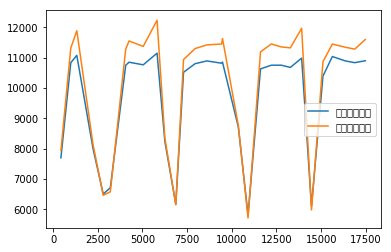

In [120]:
굴포천[['승차총승객수', '하차총승객수']].plot()

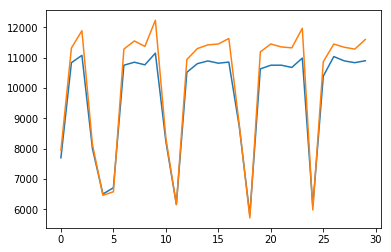

In [119]:
plt.plot(굴포천[['승차총승객수', '하차총승객수']].values)

In [115]:
굴포천.head()

사용일자  노선명   역ID   역명  승차총승객수  하차총승객수      등록일자
439   20190501  7호선  2760  굴포천    7700    7945  20190504
991   20190502  7호선  2760  굴포천   10831   11313  20190505
1328  20190503  7호선  2760  굴포천   11073   11884  20190506
2233  20190504  7호선  2760  굴포천    8008    8147  20190507
2806  20190505  7호선  2760  굴포천    6506    6466  20190508

### 널값 처리
- dropna()
- fillna()
- isnull()
- notnull()

In [121]:
d = pd.DataFrame(np.random.randint(6,size=[4,3]), columns=list('abc'))
d

a  b  c
0  3  1  3
1  2  3  1
2  5  2  4
3  5  4  0

In [122]:
d[d<2] = np.nan # None
d

a    b    c
0  3  NaN  3.0
1  2  3.0  NaN
2  5  2.0  4.0
3  5  4.0  NaN

In [56]:
d.dropna()

a    b    c
3  4.0  2.0  4.0

In [123]:
d.dropna(axis=1)

a
0  3
1  2
2  5
3  5

In [58]:
d.isnull()

a      b      c
0  False  False   True
1   True  False  False
2  False   True   True
3  False  False  False

In [124]:
d

a    b    c
0  3  NaN  3.0
1  2  3.0  NaN
2  5  2.0  4.0
3  5  4.0  NaN

In [125]:
d[d.b.notnull()]

a    b    c
1  2  3.0  NaN
2  5  2.0  4.0
3  5  4.0  NaN

In [126]:
d

a    b    c
0  3  NaN  3.0
1  2  3.0  NaN
2  5  2.0  4.0
3  5  4.0  NaN

In [129]:
d.fillna(0)

a    b    c
0  3  0.0  3.0
1  2  3.0  0.0
2  5  2.0  4.0
3  5  4.0  0.0

In [62]:
d.fillna(method='ffill')

a    b    c
0  2.0  2.0  NaN
1  2.0  4.0  2.0
2  5.0  4.0  2.0
3  4.0  2.0  4.0

In [130]:
d.fillna(method='bfill')

a    b    c
0  3  3.0  3.0
1  2  3.0  4.0
2  5  2.0  4.0
3  5  4.0  NaN

In [63]:
d.fillna({'a':-1,'b':-2,'c':-3})

a    b    c
0  2.0  2.0 -3.0
1 -1.0  4.0  2.0
2  5.0 -2.0 -3.0
3  4.0  2.0  4.0

In [64]:
d.fillna(d.mean())

a         b    c
0  2.000000  2.000000  3.0
1  3.666667  4.000000  2.0
2  5.000000  2.666667  3.0
3  4.000000  2.000000  4.0

### 중복 행 제거
- drop_duplicates()
- duplicated()

In [131]:
d = pd.DataFrame(np.random.randint(6,size=[4,3]), columns=list('abc'))
d

a  b  c
0  2  2  4
1  5  3  5
2  1  1  5
3  2  0  4

In [132]:
d.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

In [69]:
d.c.duplicated()

0    False
1    False
2     True
3     True
Name: c, dtype: bool

In [133]:
d.drop_duplicates(['c']) # c 열 기준으로 중복 제거

a  b  c
0  2  2  4
1  5  3  5

### 원핫인코딩
- get_dummies()

In [137]:
d = pd.DataFrame([['서울',9], ['부산',5], ['대구',3], ['광주',2], ['부산',4]],
                columns=['지역','인구'])
d

지역  인구
0  서울   9
1  부산   5
2  대구   3
3  광주   2
4  부산   4

In [138]:
pd.get_dummies(d.지역)

광주  대구  부산  서울
0   0   0   0   1
1   0   0   1   0
2   0   1   0   0
3   1   0   0   0
4   0   0   1   0

In [73]:
d

a  b  c
0  2  2  4
1  0  3  3
2  3  2  4
3  1  3  4

In [77]:
pd.get_dummies(d.a)

0  1  2  3
0  0  0  1  0
1  1  0  0  0
2  0  0  0  1
3  0  1  0  0

In [79]:
pd.get_dummies(d.a, prefix='a')

a_0  a_1  a_2  a_3
0    0    0    1    0
1    1    0    0    0
2    0    0    0    1
3    0    1    0    0

In [80]:
d.join(pd.get_dummies(d.a, prefix='a'))

a  b  c  a_0  a_1  a_2  a_3
0  2  2  4    0    0    1    0
1  0  3  3    1    0    0    0
2  3  2  4    0    0    0    1
3  1  3  4    0    1    0    0

In [81]:
d[['b','c']].join(pd.get_dummies(d.a, prefix='a'))

b  c  a_0  a_1  a_2  a_3
0  2  4    0    0    1    0
1  3  3    1    0    0    0
2  2  4    0    0    0    1
3  3  4    0    1    0    0

### 문자열 함수
- 305쪽 테이블 참조

In [140]:
d = pd.DataFrame([['hong',22,'seoul','hong@naver.com'],
                  ['jang',33,'incheon','jang@gmail.com'],
                  ['dooley',11,'etc','dooley@andromeda.uni']],
                columns=['name','age','address','email'])
d

name  age  address                 email
0    hong   22    seoul        hong@naver.com
1    jang   33  incheon        jang@gmail.com
2  dooley   11      etc  dooley@andromeda.uni

In [86]:
d.name.str.upper()

0      HONG
1      JANG
2    DOOLEY
Name: name, dtype: object

In [87]:
d.email.str.contains('gmail')

0    False
1     True
2    False
Name: email, dtype: bool

In [92]:
d.email.str.match(r'.+@.+\.com')

0     True
1     True
2    False
Name: email, dtype: bool

In [142]:
d.name.str[:]

0      hong
1      jang
2    dooley
Name: name, dtype: object

In [109]:
d['name2'] = d.name.str[:3]
d

name  age  address                 email name2
0    hong   22    seoul        hong@naver.com   hon
1    jang   33  incheon        jang@gmail.com   jan
2  dooley   11      etc  dooley@andromeda.uni   doo

### 날자 변환

In [118]:
d = pd.DataFrame([['2018-1-1',111], ['2020-3-1',222]], columns=['ymd','value'])
d

ymd  value
0  2018-1-1    111
1  2020-3-1    222

In [119]:
d['year'] = d.ymd.map(lambda s: int(s.split('-')[0]))
d['month'] = d.ymd.map(lambda s: int(s.split('-')[1]))
d['day'] = d.ymd.map(lambda s: int(s.split('-')[2]))
d

ymd  value  year  month  day
0  2018-1-1    111  2018      1    1
1  2020-3-1    222  2020      3    1

### 조인
- merge() : 지정된 키나 인덱스에 맞게 조인
- join() : 인덱스에 맞게 조인
- concat() : 붙이기

In [144]:
a = pd.DataFrame(np.arange(9).reshape(3,3))
b = pd.DataFrame(np.arange(100,109).reshape(3,3))
pd.concat([a,b], ignore_index=True)

0    1    2
0    0    1    2
1    3    4    5
2    6    7    8
3  100  101  102
4  103  104  105
5  106  107  108

In [147]:
a = pd.DataFrame(np.arange(9).reshape(3,3), columns=list('abc'))
b = pd.DataFrame(np.arange(100,109).reshape(3,3), columns=list('xyz'))
pd.concat([a,b], axis=1)

a  b  c    x    y    z
0  0  1  2  100  101  102
1  3  4  5  103  104  105
2  6  7  8  106  107  108

In [153]:
a = pd.DataFrame([['hong',22,'seoul','hong@naver.com'],
                  ['jang',33,'incheon','jang@gmail.com'],
                  ['sin',61,'kangwon',''],
                  ['dooley',11,'etc','dooley@andromeda.uni']],
                columns=['name','age','address','email'])
a

name  age  address                 email
0    hong   22    seoul        hong@naver.com
1    jang   33  incheon        jang@gmail.com
2     sin   61  kangwon                      
3  dooley   11      etc  dooley@andromeda.uni

In [154]:
b = pd.DataFrame([['seoul',999], ['busan',700], ['incheon',503], ['etc',300]],
                 columns=['location', 'pop'])
b = b.set_index('location')
b

pop
location     
seoul     999
busan     700
incheon   503
etc       300

In [156]:
pd.merge(a,b, left_on='address', right_index=True, how='outer')

name   age  address                 email    pop
0    hong  22.0    seoul        hong@naver.com  999.0
1    jang  33.0  incheon        jang@gmail.com  503.0
2     sin  61.0  kangwon                          NaN
3  dooley  11.0      etc  dooley@andromeda.uni  300.0
3     NaN   NaN    busan                   NaN  700.0

### 피벗

### 그룹

In [157]:
a = pd.DataFrame([['hong',22,'seoul','hong@naver.com'],
                  ['jang',33,'incheon','jang@gmail.com'],
                  ['sin',61,'seoul',''],
                  ['dooley',11,'incheon','dooley@andromeda.uni']],
                columns=['name','age','address','email'])
a

name  age  address                 email
0    hong   22    seoul        hong@naver.com
1    jang   33  incheon        jang@gmail.com
2     sin   61    seoul                      
3  dooley   11  incheon  dooley@andromeda.uni

In [169]:
a.count()

name       4
age        4
address    4
email      4
dtype: int64

In [168]:
a.groupby('address')[['name','age']].count()

name  age
address           
incheon     2    2
seoul       2    2

In [170]:
a.groupby('address').apply(lambda df: df.count())

name  age  address  email
address                           
incheon     2    2        2      2
seoul       2    2        2      2

In [171]:
a.groupby('address').count()

name  age  email
address                  
incheon     2    2      2
seoul       2    2      2

In [188]:
a.groupby('address').apply(lambda df: pd.Series([df.age.max()-df.age.min(), df.age.std()]))

0          1
address                 
incheon  22.0  15.556349
seoul    39.0  27.577164